<h1><center>YanP_01</center></h1>


<h3 align="center">Dec 03, 2022</h3> 

0.1  Student: Yan, Puwentao (V00031753)
## 1 Problem 1

1. Dataset

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
_, (x_test, y_test) = fashion_mnist.load_data()
# downsample the dataset
y_index = y_test.argsort() # sort labels and return their index
x_temp = np.zeros((5000, 28, 28), dtype=int)
y_temp = np.zeros((5000, ), dtype=int)
for i in range(10):
  x_temp[i*500:i*500+500] = x_test[y_index][i*1000:i*1000+500]
  y_temp[i*500:i*500+500] = y_test[y_index][i*1000:i*1000+500]
x_test = StandardScaler().fit_transform(x_temp.reshape(5000, 784)) # 784 dims
#x_test = x_temp
y_test = y_temp.reshape(5000,)

4422102/4422102 [==============================] - 0s 0us/step


2. Dimensionality

2.1 Run PCA

In [3]:
pca = PCA()
pca.fit(x_test)

PCA()

Text(0.5, 0, 'Top 4 Components')

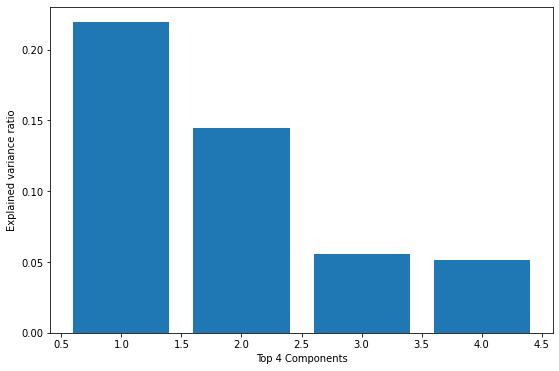

In [4]:
plt.figure(figsize=(9,6))
plt.bar(range(1,5),pca.explained_variance_ratio_[0:4])
plt.ylabel('Explained variance ratio')
plt.xlabel('Top 4 Components')

Summary:

These 4 components out of 784 components account for the vast majority of the variation.

2.2 Count the number of components I need to explain 75% of the variance

In [5]:
# Count number of components I need to explain 75% of the variance
(np.around(np.cumsum(pca.explained_variance_ratio_), 3) <= 0.75).sum()

30

From above output, we need 30 components to explain 75% of the variance.

2.3 Show the difference between the projected image and the original image.

In [6]:
# show the difference between the projected image and the original image.
d = 30
pca = PCA(n_components=d)
pca.fit(x_test)

np.random.seed(1337)
examples = np.random.randint(784, size=3)

components = pca.transform(x_test)
projected = pca.inverse_transform(components)

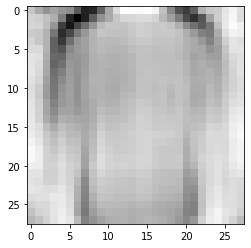

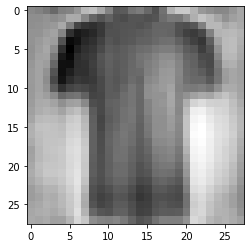

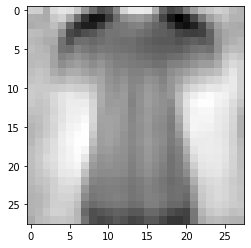

In [7]:
# projection to 30-dimensional space
for i in examples:
  imgplot = plt.imshow(projected[i].reshape(28, 28), cmap="binary")
  plt.show()

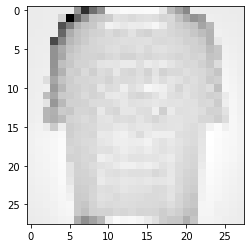

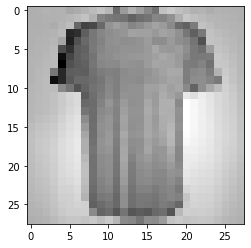

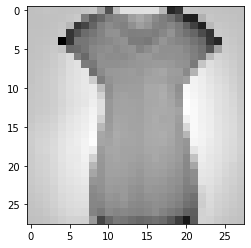

In [8]:
# original image
for i in examples:
  imgplot = plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
  plt.show()

3. Plot

In [9]:
pca = PCA(n_components=2)
pca.fit(x_test)
X_transformed = pca.transform(x_test)

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax 
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

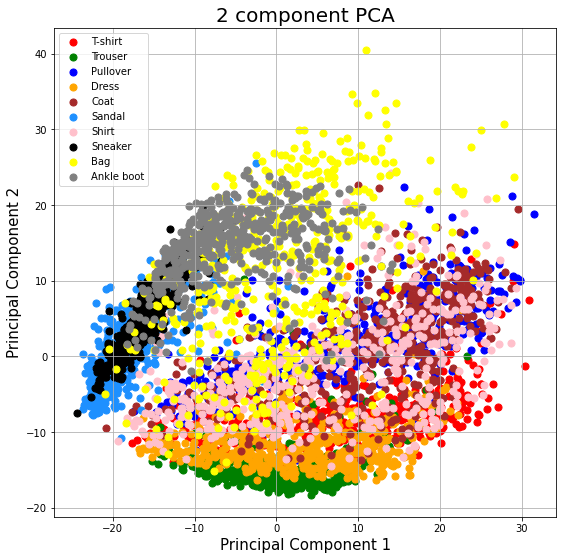

In [11]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b' ,'orange','brown','dodgerblue', 'pink', 'black', 'yellow', 'grey']
targets = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for target, color, label in zip(targets, colors, [0,1,2,3,4,5,6,7,8,9]):
    ax.scatter(X_transformed[y_test==label][:, 0]
               , X_transformed[y_test==label][:, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

I won't be able to distinguish classes without knowing the colours in advance.

4. SNE

In [12]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


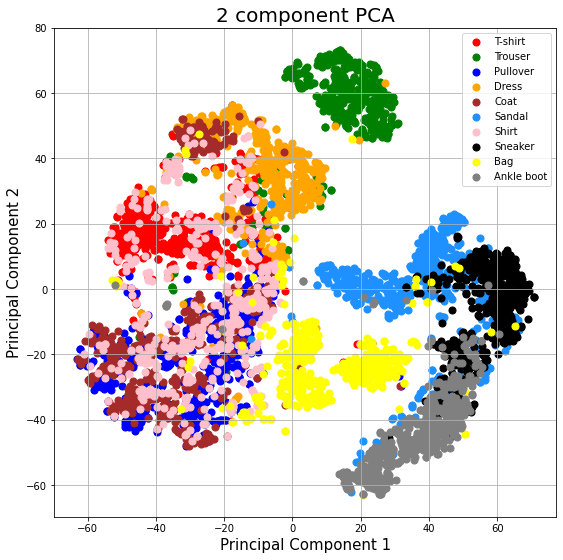

In [13]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b' ,'orange','brown','dodgerblue', 'pink', 'black', 'yellow', 'grey']
targets = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for target, color, label in zip(targets, colors, [0,1,2,3,4,5,6,7,8,9]):
    ax.scatter(tsne_result[y_test==label][:, 0]
               , tsne_result[y_test==label][:, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Yes, I can distinguish classes without knowing the colours in advance now, and its more informative than the PCA-based scatter plot.